# Pymaceuticals Inc.
---

### Analysis

- From the pie chart it can be observerd that of male versus female subjects is almost 50/50.We can say that having an even gender distribution is a good thing for testing drugs.
- The correlation coefficient between mouse weight and average tumor volume is 0.84 which can be used ot imply that there is a hight positve correlation betweenmouse weight and average tumor volume for the drug Capomulin regimen and can alsobe seen in the scatter plot.
- From the bar chart of mice per drug regimen, we can conclude that there are 10 treatments used for the study. The highest number of mice in the study are treated using Capomulin. while the lowest number of mice in the study are treated using Propriva.
- From the study of Mouse ID l509 who was treated wiht Capomulin it can be found that the tumor volume seems to decrease with time.
 

In [120]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn.linear_model import LinearRegression
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results,mouse_metadata,how="outer", on='Mouse ID')
# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
number_of_mice = len(merged_df["Mouse ID"].unique())

number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicates

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated= merged_df[merged_df.duplicated(subset=["Mouse ID", "Timepoint"], keep = False)]
duplicated

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[merged_df['Mouse ID'].isin(duplicates)== False]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [11]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_clean = len(clean_df["Mouse ID"].unique())
number_of_mice_clean

248

## Summary Statistics

In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
group_regimen=clean_df.groupby('Drug Regimen')
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = group_regimen["Tumor Volume (mm3)"].mean()
median = group_regimen["Tumor Volume (mm3)"].median()
variance = group_regimen["Tumor Volume (mm3)"].var()
std = group_regimen["Tumor Volume (mm3)"].std()
sem = group_regimen["Tumor Volume (mm3)"].sem()



# Assemble the resulting series into a single summary DataFrame.

summary_df1=pd.DataFrame({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume": median,
    "Tumor Volume Variance": variance,
    "Tumor Volume Std. Dev.": std,
    "Tumor Volume Std. Err": sem})
summary_df1


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [32]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
group_regimen=clean_df.groupby('Drug Regimen')
# Using the aggregation method, produce the same summary statistics in a single line
summary = group_regimen["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary

summary_df = summary.rename(columns={"mean": "Mean Tumor Volume", "median": "Median Tumor Volume", "var": "Tumor Volume Variance", "std": "Tumor Volume Std. Dev.", "sem": "Tumor Volume Std. Err."})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

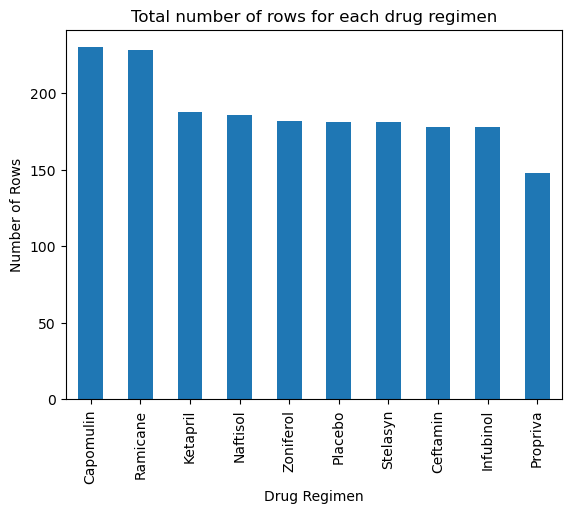

In [60]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# timepoint=clean_df.groupby("Drug Regimen").count()

# grouped_df.plot.bar(y="Mouse ID", rot=80)
# plt.xlabel("Drug Regimen")
# plt.ylabel("Number of Rows")
# plt.legend(["Mouse ID/Timepoints"])
# plt.show()

grouped_data = clean_df.groupby("Drug Regimen")["Mouse ID"].count()
drug_counts = grouped_data.sort_values(ascending=False)
drug_counts.plot(kind="bar", title="Total number of rows for each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows")
plt.show()

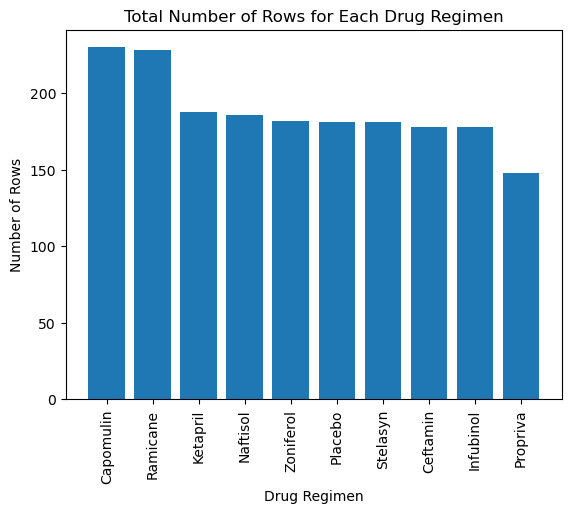

In [61]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# group_regimen=clean_df.groupby('Drug Regimen')
grouped_data = clean_df.groupby("Drug Regimen")["Mouse ID"].count()
drug_counts = grouped_data.sort_values(ascending=False)

drugs = drug_counts.index.values
values = drug_counts.values
plt.bar(drugs, values)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xticks(rotation=90) 
plt.show()

                                           


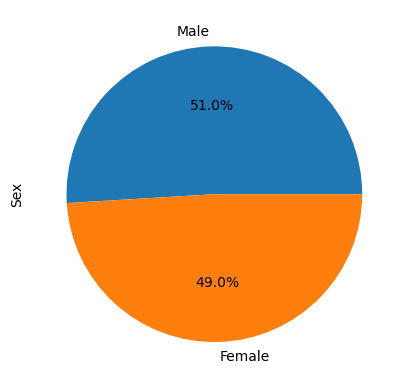

In [128]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_df = clean_df["Sex"].value_counts()
sex_df.plot(kind='pie', labels=["Male", "Female"], autopct="%1.1f%%", ylabel= "Sex")
plt.show()

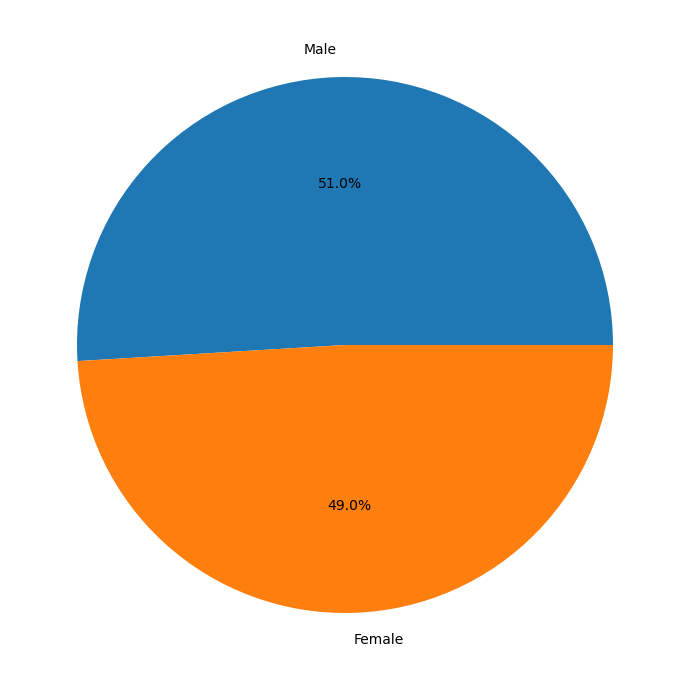

In [82]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = clean_df["Sex"].value_counts()
# fig = plt.figure(figsize =(10, 7))
fig = plt.figure(figsize =(10, 7))
plt.pie(sex, labels = ["Male", "Female"],autopct="%1.1f%%")
plt.tight_layout()
# show plot
plt.show()

## Quartiles, Outliers and Boxplots

In [85]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
mouse_data = clean_df[clean_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoint, mouse_data, on=["Mouse ID", "Timepoint"], how="left")
# merged_data[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]

In [94]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []


for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_df = merged_data.loc[merged_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    # Add this data frame to the list
    tumor_data.append(tumor_df)
    
 # Calculate the IQR and quantitatively determine if there are any potential outliers.    
    quartiles = tumor_df.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
     

    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    #Check for outliers
    outliers = tumor_df.loc[(tumor_df < lower_bound) | (tumor_df > upper_bound)]

    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


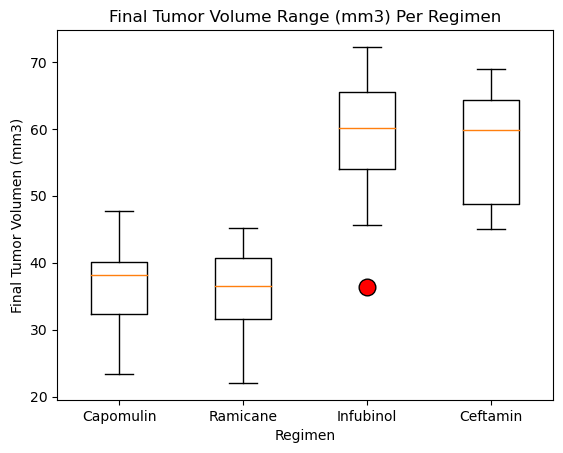

In [100]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
marker_circle = dict(markerfacecolor="r", marker="o",markersize=12)
plt.subplots()
plt.title("Final Tumor Volume Range (mm3) Per Regimen")
plt.xlabel("Regimen")
plt.ylabel("Final Tumor Volumen (mm3)")
plt.boxplot(tumor_data, labels=treatments , flierprops=marker_circle)
plt.show()

## Line and Scatter Plots

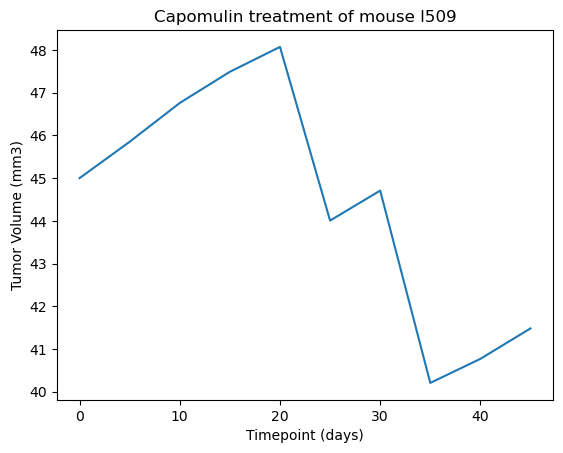

In [105]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = "l509"
mouse_data = clean_df[(clean_df["Drug Regimen"]=="Capomulin") & (clean_df["Mouse ID"] == mouse_id)]
mouse_data1 = mouse_data.sort_values("Timepoint")
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

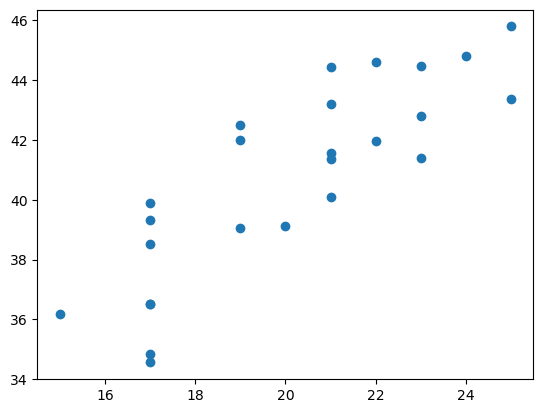

In [110]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_df[(clean_df["Drug Regimen"] == "Capomulin")]

average_tumor_volume = capomulin_data.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
tumor_weight = capomulin_data.groupby(["Mouse ID"])["Weight (g)"].first()
# Generate a scatter plot
plt.scatter(tumor_weight, average_tumor_volume)



# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

## Correlation and Regression

The correlation coefficient between mouse weight and tumor volume is 0.84
The linear regression equation between mouse weight and tumor volume is y = 0.95x + 21.55


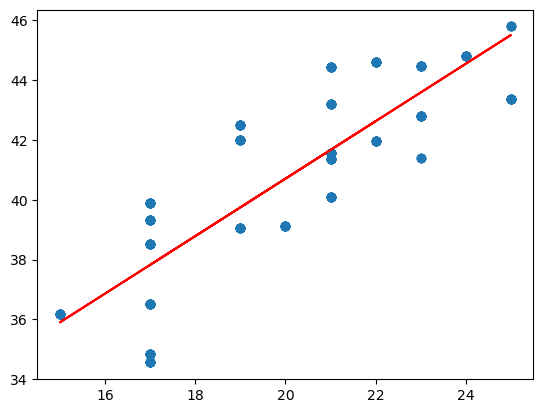

In [135]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
apomulin_data = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]

# Group the data by mouse ID and calculate the average tumor volume
capomulin_grouped = capomulin_data.groupby("Mouse ID")
capomulin_avg = capomulin_grouped.mean(numeric_only=True)
# Extract the mouse weight and tumor volume columns
mouse_weight = capomulin_avg["Weight (g)"]
tumor_volume = capomulin_avg["Tumor Volume (mm3)"]


correlation = st.pearsonr(mouse_weight, tumor_volume)
print(f"The correlation coefficient between mouse weight and tumor volume is {correlation[0]:.2f}")

slope, intercept, rvalue, pvalue, stderr = st.linregress(mouse_weight, tumor_volume)
regress_values = mouse_weight * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
print(f"The linear regression equation between mouse weight and tumor volume is {line_eq}")

# Plot the data and the regression line
plt.scatter(df_merged_final["Weight (g)"], df_merged_final["Tumor Volume (mm3)"])
plt.plot(df_merged_final["Weight (g)"], y_pred, color='red')
plt.show()